# Зээлийн өгөгдлийн ангиллын анализ

Энэхүү дүн шинжилгээнд бид `loan_data.csv` файлыг ашиглан зээлийн хэмжээгээр (`Amount`) өндөр эсэхийг ангиллын аргаар тодорхойлж, олон төрлийн ангиллын загваруудыг туршина.

**Алхамууд:**
1. Өгөгдөл унших  
2. Анхан шатны дүн шинжилгээ (EDA)  
3. Ангиллын зорилго (`HighAmount`) үүсгэх  
4. Өгөгдөл бэлтгэл (Шимт цэгшүүлэлт, хуваалт)  
5. Моделийн сургалт (LogisticRegression, DecisionTree, RandomForest, KNN, SVM, NaiveBayes)  
6. Үр дүнг үнэлэх (accuracy, precision, recall, f1, ROC AUC)  


In [1]:
# 1. Шаардлагатай сангуудыг импортлох
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


In [2]:
# 2. Өгөгдлийг унших
df = pd.read_csv('loan_data.csv')
df.head()

,LoanID,CustomerID,Amount,InterestRate,LoanDate,TermMonths
0,1,115795,14160.61,15.65,2024-10-10,12
1,2,100860,36431.40,11.60,2024-04-30,60
2,3,176820,8808.68,19.76,2020-11-12,60
3,4,154886,41157.59,10.85,2021-10-21,60
4,5,106265,30985.18,8.23,2023-04-08,12


In [3]:
# 3. Ангиллын зорилго үүсгэх: 
# 'HighAmount' = Amount > median(Amount)
median_amount = df['Amount'].median()
df['HighAmount'] = (df['Amount'] > median_amount).astype(int)
df['HighAmount'].value_counts()

HighAmount
0    50000
1    50000
Name: count, dtype: int64

In [4]:
# 4. Өгөгдөл бэлтгэл: 
# Шаардлагатай шинж чанарыг сонгох
features = ['InterestRate', 'TermMonths']
X = df[features]
y = df['HighAmount']

# Мэдээллийг сургалт, шалгалтын бүлэгт хуваах
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Шимт (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# 5. Моделүүдийг тодорхойлох ба сургалт (бүх модельд нэгэн үйлдэлтэйгээр)
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Naive Bayes': GaussianNB()
}

results = []

for name, model in models.items():
    # Сургалт
    model.fit(X_train_scaled, y_train)
    # Таамаглал
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    # Үнэлгээ
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })

# DataFrame болгон харуулах
results_df = pd.DataFrame(results).sort_values(by='ROC AUC', ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.504200,0.504188,0.505600,0.504893,0.501256
4,Support Vector Machine,0.500300,0.500259,0.580200,0.537272,0.500000
5,Naive Bayes,0.500733,0.500627,0.585200,0.539620,0.499328
1,Decision Tree,0.496667,0.496125,0.426733,0.458820,0.495353
2,Random Forest,0.497533,0.497567,0.504533,0.501026,0.494986
3,K-Nearest Neighbors,0.493100,0.493056,0.489933,0.491490,0.494467


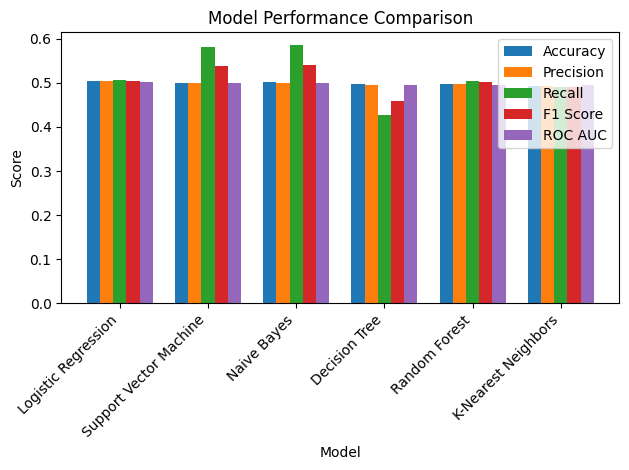

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
model_names = results_df['Model'].tolist()

x = np.arange(len(model_names))
width = 0.15

plt.figure()
for i, metric in enumerate(metrics):
    plt.bar(x + i*width, results_df[metric], width, label=metric)

plt.xticks(x + width*2, model_names, rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()

plt.show()
